In [204]:
import numpy as np #Importing the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [205]:
dataset = pd.read_csv('50_Startups.csv') #Importing the dataset fetched from Kaggle 
dataset.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [206]:
dataset.shape #Defines the number of (rows, columns)

(50, 5)

In [207]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [208]:
dataset.isnull().any() #This is used to check the presence of missing values in the data

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [219]:
X = dataset.iloc[: , :4].values #This is the slicing techinique of data, separating the features apart i.e., X
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [220]:
Y = dataset.iloc[:, -1].values #Slicing the target i.e., Y
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

/Users/rohailusman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

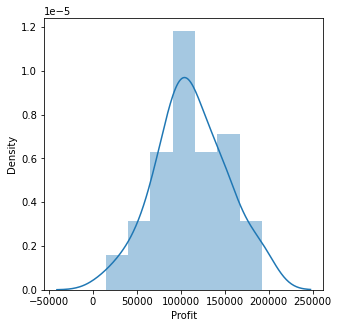

In [218]:
import seaborn as sns
plt.figure(figsize = (5,5)) #Using to visualise the average value of the profit
plt.tight_layout()
sns.distplot(dataset['Profit'])

In [221]:
X = dataset.iloc[: , :4].values
X
print(dataset['State'].unique())

['New York' 'California' 'Florida']


In [224]:
#Since the fourth column is a Categoical Data = we must encode it in 0&1
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
encoded_X = ct.fit_transform(X)

In [225]:
encoded_X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [228]:
#Splitting the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(encoded_X, Y, test_size = 0.2, random_state = 584) 
#random_state ensures the stability of the train_test_split each time the code is executed

In [229]:
#Fitting Multilinear Regression to the Training Set
from sklearn.linear_model import LinearRegression
# This LinearRegression import will minimize the residual error of sqaures between the observed targets and predicted targets
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [230]:
X_train.shape

(40, 6)

In [232]:
Y_train.shape

(40,)

In [233]:
X_test.shape

(10, 6)

In [234]:
Y_test.shape

(10,)

In [236]:
print(regressor.coef_) #The coefficients of respective features or X's

[ 4.04342385e+02 -8.50379894e+02  4.46037509e+02  8.38947725e-01
 -4.30346933e-02  2.31597847e-02]


In [238]:
Y_pred = regressor.predict(X_test) #Validates the prediction of is correct or not

In [250]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) #Comparision between Observation and Predictions
df1 = df.head()
df

,Actual,Predicted
0,152211.77,151525.091979
1,141585.52,127336.793009
2,96479.51,89282.507944
3,124266.90,127172.482041
4,144259.40,135830.062704
5,96712.80,86582.466601
6,90708.19,71520.604404
7,156991.12,164325.517532
8,69758.98,57928.999173
9,77798.83,71847.285349


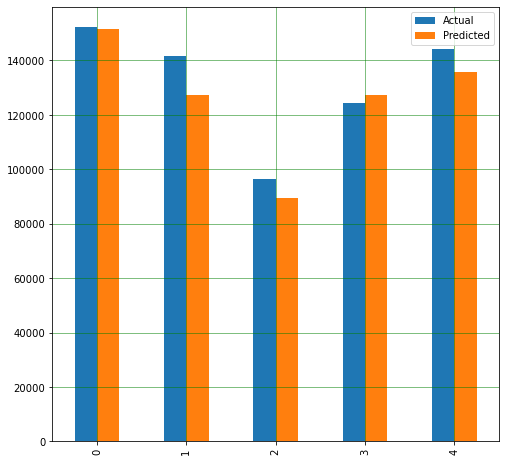

In [251]:
df1.plot(kind = 'bar', figsize = (8,8)) #Bar Graph for clear depiction of comparision
plt.grid(which = 'major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which = 'minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [254]:
from sklearn import metrics
#Evaluation of the performance of the algorithm by finding values of MAE, MSE & RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 8790.11684095517
Mean Squared Error: 103474053.34450155
Root Mean Squared Error: 10172.219686209179
